<a href="https://colab.research.google.com/github/SvetlanaShkryleva/image-processing/blob/main/Practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ 3
1. Для изображения sar_3.jpg найти наиболее протяженный участок
(выделить линии при помощи преобразования Хафа)
2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы


In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [28]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
eq_gray = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
# точечная бинаризация

In [30]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 40
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

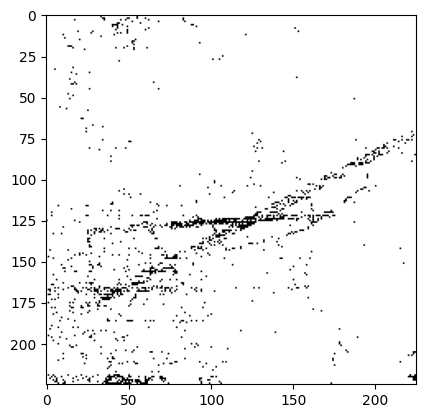

In [31]:
plt.imshow(bin_img, cmap="gray")

In [32]:
# бинаризация отсу

In [33]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

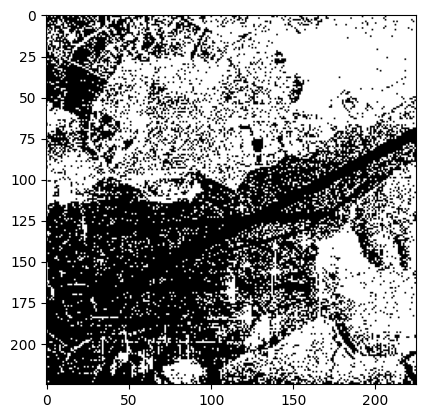

In [34]:
plt.imshow(th2, cmap="gray")

In [35]:
# адаптивная бинаризация

In [36]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,71,21)
th31 = cv2.adaptiveThreshold(eq_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,45)

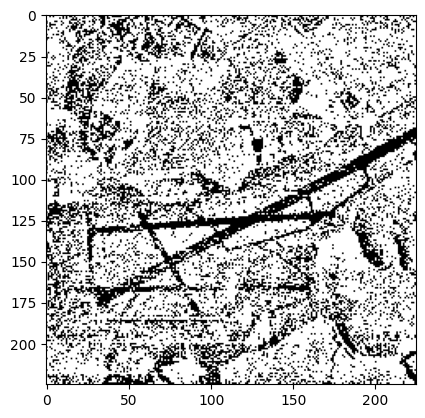

In [37]:
plt.imshow(th3, cmap="gray")

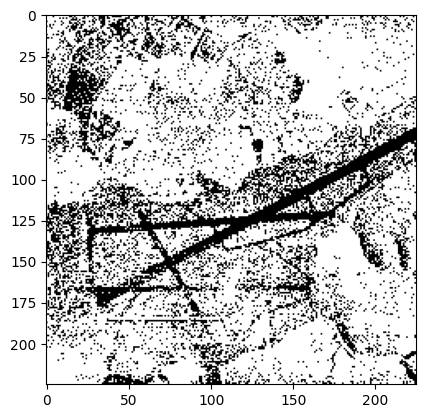

In [38]:
plt.imshow(th31, cmap="gray")

In [39]:
# выделение дороги, подсчёт протяженности (длины отрезков)

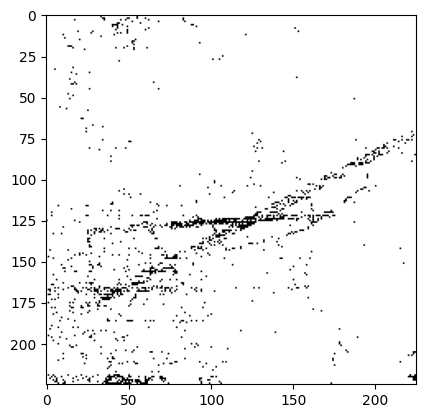

In [40]:
plt.imshow(bin_img, cmap="gray")

In [41]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
eq_gray = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

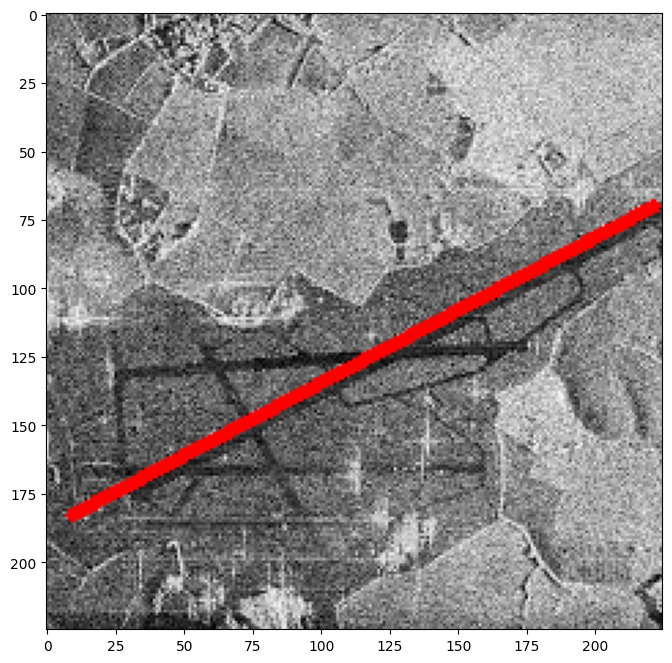

In [51]:
# Находим самую длинную линию
max_length = 0
longest_line = None

if tlines is not None:
    for line in tlines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if length > max_length:
            max_length = length
            longest_line = (x1, y1, x2, y2)

image_longest_only = cv2.imread('sar_3.jpg')
image_longest_only = cv2.cvtColor(image_longest_only, cv2.COLOR_BGR2RGB)

if longest_line is not None:
    x1, y1, x2, y2 = longest_line
    cv2.line(image_longest_only, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.figure(figsize=(10, 8))
plt.imshow(image_longest_only)

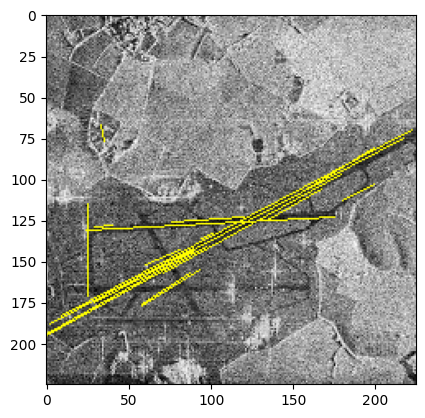

In [43]:
plt.imshow(image, cmap="gray")

In [44]:
image1 = cv2.imread('sar_3.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
eq_gray1 = cv2.equalizeHist(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY))
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [45]:
import copy

bin_img1 = copy.deepcopy(eq_gray1)
T  = 16
bin_img1[eq_gray1 < T] = 0
bin_img1[eq_gray1 >= T] = 255

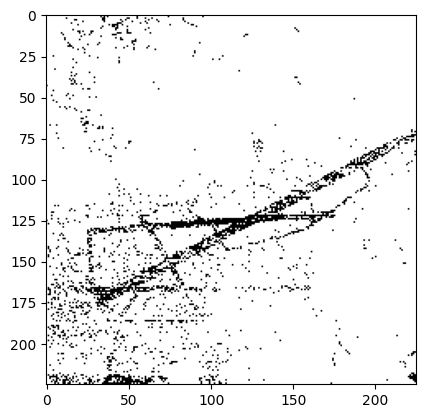

In [46]:
plt.imshow(bin_img1, cmap="gray")

In [47]:
edges1 = cv2.Canny(bin_img1,0,1,apertureSize = 5)
minLineLength1 = 10
tlines1 = cv2.HoughLinesP(edges1,1,np.pi/180,100,minLineLength,maxLineGap=10)

for i in range(len(tlines1)):
    x1 = tlines1[i][0][0]
    y1 = tlines1[i][0][1]
    x2 = tlines1[i][0][2]
    y2 = tlines1[i][0][3]
    #print(x1, y1, x2, y2)
    cv2.line(image1,(x1,y1),(x2,y2),(255,255,0),1)

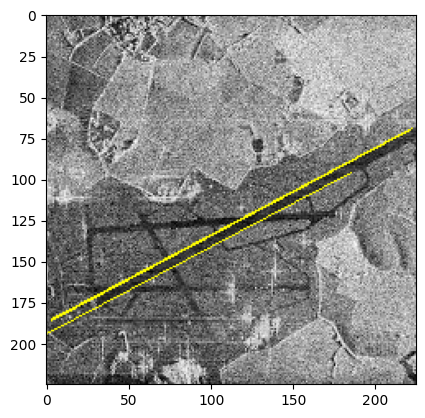

In [48]:
plt.imshow(image1, cmap="gray")